# Mock Data Exploration

This notebook explores the mock datasets generated for the visualization team.

**Mock Data Location**: `data/mock/`

**Contents**:
1. Business Metadata
2. User Visit Flows
3. XGBoost Predictions
4. LSTM Predictions
5. Model Comparison
6. Data Quality Checks


In [1]:
import polars as pl
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pl.Config.set_tbl_rows(20)
pl.Config.set_tbl_cols(15)
sns.set_style('whitegrid')

# Paths
MOCK_DIR = Path('../data/mock')

print("✅ Imports successful!")


✅ Imports successful!


---
## 1. Business Metadata

Load and explore business data (restaurants in Atlanta).


In [2]:
# Load business data
businesses = pl.read_parquet(MOCK_DIR / 'businesses.parquet')

print(f"📊 Total businesses: {len(businesses):,}")
print(f"📍 Location: Atlanta, GA")
print(f"\nColumns: {businesses.columns}")
print(f"\nShape: {businesses.shape}")

businesses.head(10)


📊 Total businesses: 100
📍 Location: Atlanta, GA

Columns: ['gmap_id', 'name', 'lat', 'lon', 'category_main', 'category_all', 'avg_rating', 'num_reviews', 'price_bucket', 'is_closed', 'relative_results']

Shape: (100, 11)


gmap_id,name,lat,lon,category_main,category_all,avg_rating,num_reviews,price_bucket,is_closed,relative_results
str,str,f64,f64,str,list[str],f64,i64,i64,bool,list[str]
"""0x88f0bc1b7:034ea3""","""The Varsity""",33.610004,-84.489988,"""burger""","[""burger"", ""pizza"", ""ice_cream""]",4.398028,26,2,false,"[""0x88f0af948:0846d1"", ""0x88f0208ce:0200ac"", … ""0x88f0cfb70:0bec8d""]"
"""0x88f050d8c:08b695""","""Mary Mac's Tea Room""",33.835706,-84.276228,"""american""","[""american"", ""bakery"", ""asian""]",4.488613,325,2,false,"[""0x88f05f8c9:040378"", ""0x88f04f88c:0dbde5"", … ""0x88f0ac375:049a3d""]"
"""0x88f0c1b28:052c18""","""Busy Bee Cafe""",33.909227,-84.205911,"""burger""","[""burger"", ""cafe""]",3.959508,23,1,false,"[""0x88f0bb263:0edf24"", ""0x88f075cfa:0420db"", … ""0x88f0e6817:0692b8""]"
"""0x88f0295bb:04e6cf""","""Fox Bros. Bar-B-Q""",33.965254,-84.373128,"""sushi""","[""sushi""]",5.0,104,3,false,"[""0x88f07db22:0bcfbf"", ""0x88f08de15:03cfd3"", … ""0x88f058c6a:0a60a3""]"
"""0x88f0c6910:0d0eb3""","""Antico Pizza""",33.645821,-84.246085,"""cafe""","[""cafe""]",3.818315,74,3,true,"[""0x88f040e70:08c913"", ""0x88f0193ea:0d1450"", … ""0x88f067233:055b6b""]"
"""0x88f05613c:0a9a84""","""Bone's Restaurant""",33.97878,-84.565739,"""mexican""","[""mexican"", ""seafood"", ""dessert""]",3.821949,16,1,false,"[""0x88f039484:0c14f6"", ""0x88f092161:0a529e"", … ""0x88f06836a:07e8e5""]"
"""0x88f088915:09ce9d""","""South City Kitchen""",33.780594,-84.500838,"""bakery""","[""bakery""]",4.245177,1,3,true,"[""0x88f0af0e0:050ca2"", ""0x88f01a414:02a969"", … ""0x88f0abec9:0916af""]"
"""0x88f0e146d:0917ec""","""Canoe""",33.922999,-84.523836,"""bar""","[""bar""]",3.065049,14,3,false,"[""0x88f08ff8e:0d30eb"", ""0x88f026482:0c4cb9"", … ""0x88f01c312:0304a1""]"
"""0x88f042fd5:08074c""","""Bacchanalia""",33.794256,-84.514501,"""fast_food""","[""fast_food"", ""steakhouse"", ""sushi""]",3.492301,53,1,false,"[""0x88f07c5ca:05c4e5"", ""0x88f0e122d:0e1683"", … ""0x88f0d36c6:0e0f46""]"


In [3]:
# Business statistics
print("=" * 80)
print("BUSINESS STATISTICS")
print("=" * 80)

print(f"\n📈 Rating Statistics:")
print(f"  Mean rating: {businesses['avg_rating'].mean():.2f}")
print(f"  Median rating: {businesses['avg_rating'].median():.2f}")
print(f"  Min rating: {businesses['avg_rating'].min():.2f}")
print(f"  Max rating: {businesses['avg_rating'].max():.2f}")

print(f"\n🍽️ Category Distribution:")
category_counts = businesses.group_by('category_main').agg(
    pl.count().alias('count')
).sort('count', descending=True)
print(category_counts.head(10))

print(f"\n💰 Price Distribution:")
price_counts = businesses.group_by('price_bucket').agg(
    pl.count().alias('count')
).sort('price_bucket')
print(price_counts)

print(f"\n🏪 Business Status:")
print(f"  Open: {businesses.filter(~pl.col('is_closed')).height}")
print(f"  Closed: {businesses.filter(pl.col('is_closed')).height}")


BUSINESS STATISTICS

📈 Rating Statistics:
  Mean rating: 4.03
  Median rating: 4.08
  Min rating: 2.53
  Max rating: 5.00

🍽️ Category Distribution:
shape: (10, 2)
┌───────────────┬───────┐
│ category_main ┆ count │
│ ---           ┆ ---   │
│ str           ┆ u32   │
╞═══════════════╪═══════╡
│ restaurant    ┆ 10    │
│ mexican       ┆ 8     │
│ bar           ┆ 7     │
│ seafood       ┆ 7     │
│ burger        ┆ 6     │
│ cafe          ┆ 6     │
│ italian       ┆ 6     │
│ ice_cream     ┆ 6     │
│ asian         ┆ 5     │
│ wine_bar      ┆ 4     │
└───────────────┴───────┘

💰 Price Distribution:
shape: (5, 2)
┌──────────────┬───────┐
│ price_bucket ┆ count │
│ ---          ┆ ---   │
│ i64          ┆ u32   │
╞══════════════╪═══════╡
│ null         ┆ 9     │
│ 1            ┆ 29    │
│ 2            ┆ 22    │
│ 3            ┆ 29    │
│ 4            ┆ 11    │
└──────────────┴───────┘

🏪 Business Status:
  Open: 80
  Closed: 20


/var/folders/x_/cp6k40b141nfh4rft4427nbm0000gn/T/ipykernel_85691/2441563500.py:14: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('count')
/var/folders/x_/cp6k40b141nfh4rft4427nbm0000gn/T/ipykernel_85691/2441563500.py:20: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('count')


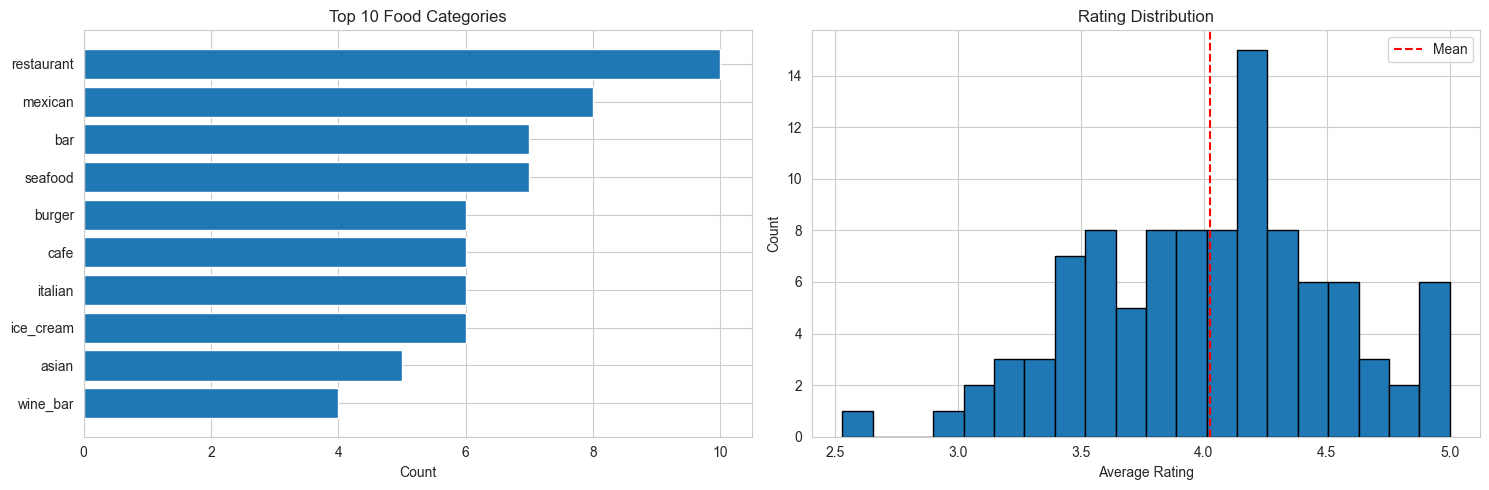

In [4]:
# Visualize category distribution and ratings
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Category counts
cat_data = category_counts.to_pandas()
axes[0].barh(cat_data['category_main'][:10], cat_data['count'][:10])
axes[0].set_xlabel('Count')
axes[0].set_title('Top 10 Food Categories')
axes[0].invert_yaxis()

# Rating distribution
axes[1].hist(businesses['avg_rating'].to_numpy(), bins=20, edgecolor='black')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Rating Distribution')
axes[1].axvline(businesses['avg_rating'].mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()


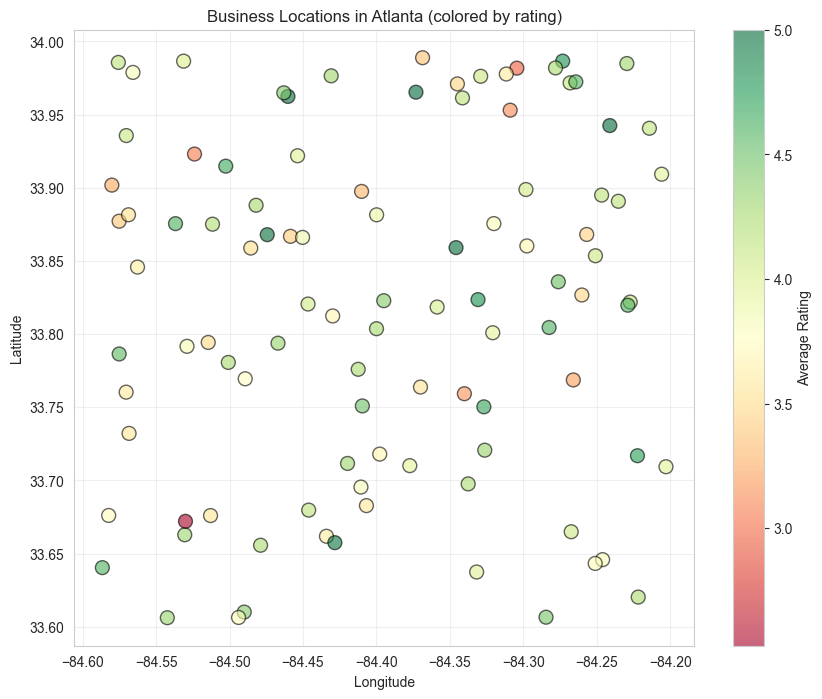


📍 Geographic Bounds:
  Latitude: 33.6061 to 33.9888
  Longitude: -84.5866 to -84.2030


In [5]:
# Geographic distribution
plt.figure(figsize=(10, 8))
plt.scatter(businesses['lon'], businesses['lat'], 
           c=businesses['avg_rating'], cmap='RdYlGn', 
           s=100, alpha=0.6, edgecolors='black')
plt.colorbar(label='Average Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Business Locations in Atlanta (colored by rating)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📍 Geographic Bounds:")
print(f"  Latitude: {businesses['lat'].min():.4f} to {businesses['lat'].max():.4f}")
print(f"  Longitude: {businesses['lon'].min():.4f} to {businesses['lon'].max():.4f}")


---
## 2. User Visit Flows

Explore consecutive restaurant visits by users.


In [6]:
# Load flows
flows = pl.read_parquet(MOCK_DIR / 'flows.parquet')

print(f"📊 Total flows: {len(flows):,}")
print(f"👥 Unique users: {flows['user_id'].n_unique():,}")
print(f"\nColumns: {flows.columns}")
print(f"\nShape: {flows.shape}")

flows.head(10)


📊 Total flows: 1,000
👥 Unique users: 153

Columns: ['user_id', 'src_gmap_id', 'dst_gmap_id', 'src_ts', 'dst_ts', 'delta_hours', 'src_category', 'dst_category', 'src_lat', 'src_lon', 'dst_lat', 'dst_lon', 'distance_km']

Shape: (1000, 13)


user_id,src_gmap_id,dst_gmap_id,src_ts,dst_ts,delta_hours,src_category,dst_category,src_lat,src_lon,dst_lat,dst_lon,distance_km
str,str,str,datetime[μs],datetime[μs],f64,str,str,f64,f64,f64,f64,f64
"""user_000000""","""0x88f0403e1:040b60""","""0x88f0e9eb2:070c4b""",2021-09-17 00:00:00,2021-09-17 17:29:39.577323,17.494327,"""bakery""","""chinese""",33.901774,-84.580095,33.981844,-84.278154,29.20299
"""user_000000""","""0x88f0e9eb2:070c4b""","""0x88f05b2b8:04cb45""",2021-09-20 11:43:14.844721,2021-09-21 02:35:01.186503,14.862873,"""chinese""","""cafe""",33.981844,-84.278154,33.86789,-84.474326,22.045909
"""user_000000""","""0x88f09ff4a:0765a6""","""0x88f01f229:0b4511""",2021-09-23 04:49:03.566566,2021-09-23 07:22:08.855665,2.551469,"""burger""","""cafe""",33.759214,-84.340176,33.971634,-84.268216,24.495933
"""user_000000""","""0x88f059593:0d7ba2""","""0x88f0319d9:0db119""",2021-09-24 23:46:04.510048,2021-09-25 17:10:47.751984,17.412012,"""dessert""","""italian""",33.606497,-84.284592,33.853499,-84.250968,27.592894
"""user_000000""","""0x88f059593:0d7ba2""","""0x88f0c55fe:04f1f2""",2021-09-28 13:45:38.554529,2021-09-30 05:26:03.781846,39.673674,"""dessert""","""wine_bar""",33.606497,-84.284592,33.80447,-84.282506,21.975817
"""user_000000""","""0x88f09af63:04a0da""","""0x88f0802a5:079817""",2021-10-02 07:02:52.250841,2021-10-02 11:00:09.523813,3.954798,"""wine_bar""","""seafood""",33.962369,-84.46025,33.750868,-84.409598,23.935292
"""user_000000""","""0x88f09f0eb:08d633""","""0x88f0eae02:029245""",2021-10-03 08:44:27.704696,2021-10-05 02:33:41.281663,41.820438,"""seafood""","""seafood""",33.606139,-84.542338,33.760283,-84.570367,17.305082
"""user_000000""","""0x88f0e1fb6:0cbf0f""","""0x88f0c03ec:0e0d66""",2021-10-06 18:35:31.294431,2021-10-06 19:15:48.010348,0.67131,"""mexican""","""burger""",33.643238,-84.251133,33.988823,-84.36861,39.866385
"""user_000000""","""0x88f058ecc:0d1b09""","""0x88f08c857:02b185""",2021-10-09 02:13:25.066204,2021-10-09 05:55:27.293693,3.700619,"""restaurant""","""ice_cream""",33.940627,-84.214236,33.875445,-84.536768,30.569656


In [7]:
# Flow statistics
print("=" * 80)
print("FLOW STATISTICS")
print("=" * 80)

print(f"\n⏱️ Time Delta Statistics:")
print(f"  Mean: {flows['delta_hours'].mean():.2f} hours")
print(f"  Median: {flows['delta_hours'].median():.2f} hours")
print(f"  Min: {flows['delta_hours'].min():.2f} hours")
print(f"  Max: {flows['delta_hours'].max():.2f} hours")

print(f"\n📏 Distance Statistics:")
print(f"  Mean: {flows['distance_km'].mean():.2f} km")
print(f"  Median: {flows['distance_km'].median():.2f} km")
print(f"  Min: {flows['distance_km'].min():.2f} km")
print(f"  Max: {flows['distance_km'].max():.2f} km")

print(f"\n🔄 Category Transitions (Top 10):")
transitions = flows.group_by(['src_category', 'dst_category']).agg(
    pl.count().alias('count')
).sort('count', descending=True)
print(transitions.head(10))


FLOW STATISTICS

⏱️ Time Delta Statistics:
  Mean: 15.18 hours
  Median: 13.25 hours
  Min: 0.50 hours
  Max: 47.79 hours

📏 Distance Statistics:
  Mean: 21.22 km
  Median: 20.64 km
  Min: 1.02 km
  Max: 50.85 km

🔄 Category Transitions (Top 10):
shape: (10, 3)
┌──────────────┬──────────────┬───────┐
│ src_category ┆ dst_category ┆ count │
│ ---          ┆ ---          ┆ ---   │
│ str          ┆ str          ┆ u32   │
╞══════════════╪══════════════╪═══════╡
│ restaurant   ┆ restaurant   ┆ 11    │
│ mexican      ┆ restaurant   ┆ 10    │
│ restaurant   ┆ seafood      ┆ 10    │
│ burger       ┆ burger       ┆ 10    │
│ restaurant   ┆ bar          ┆ 9     │
│ restaurant   ┆ asian        ┆ 9     │
│ mexican      ┆ seafood      ┆ 9     │
│ restaurant   ┆ mexican      ┆ 9     │
│ restaurant   ┆ ice_cream    ┆ 8     │
│ mexican      ┆ mexican      ┆ 8     │
└──────────────┴──────────────┴───────┘


/var/folders/x_/cp6k40b141nfh4rft4427nbm0000gn/T/ipykernel_85691/427352167.py:20: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('count')


---
## 3. XGBoost Predictions

Explore XGBoost model predictions (top-10 recommendations per flow).


In [8]:
# Load XGBoost predictions
xgb_preds = pl.read_parquet(MOCK_DIR / 'xgboost_predictions.parquet')

print(f"📊 Total predictions: {len(xgb_preds):,}")
print(f"👥 Unique users: {xgb_preds['user_id'].n_unique():,}")
print(f"🎯 Predictions per flow: {len(xgb_preds) // flows.height}")
print(f"\nColumns: {xgb_preds.columns}")

xgb_preds.head(10)


📊 Total predictions: 10,000
👥 Unique users: 153
🎯 Predictions per flow: 10

Columns: ['user_id', 'src_gmap_id', 'dst_gmap_id', 'dst_name', 'dst_category', 'dst_rating', 'score', 'rank', 'is_actual', 'model']


user_id,src_gmap_id,dst_gmap_id,dst_name,dst_category,dst_rating,score,rank,is_actual,model
str,str,str,str,str,f64,f64,i64,bool,str
"""user_000000""","""0x88f0403e1:040b60""","""0x88f0d63b5:036726""","""Aunt Phoenix's Burger""","""burger""",4.053739,0.915434,1,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f0c03ec:0e0d66""","""The Eagle's Burger""","""burger""",3.35783,0.886016,2,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f09ff4a:0765a6""","""The Dragon's Burger""","""burger""",3.169602,0.768768,3,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f074dca:058d96""","""Aunt Eagle's Mexican""","""mexican""",3.591924,0.707689,4,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f045573:0b4d18""","""Aunt Tiger's Ice_Cream""","""ice_cream""",5.0,0.628636,5,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f07e26c:0f0ecb""","""Two Urban Licks""","""fast_food""",3.968197,0.547022,6,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f091919:0a61a6""","""Waffle House""","""wine_bar""",3.693847,0.518328,7,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f0cae53:0de2b4""","""Flying Biscuit Cafe""","""bar""",4.306171,0.446403,8,false,"""xgboost"""
"""user_000000""","""0x88f0403e1:040b60""","""0x88f05613c:0a9a84""","""Bone's Restaurant""","""mexican""",3.821949,0.336678,9,false,"""xgboost"""


In [9]:
# XGBoost metrics
print("=" * 80)
print("XGBOOST METRICS")
print("=" * 80)

# Calculate Recall@K
for k in [1, 3, 5, 10]:
    recall = xgb_preds.filter(
        (pl.col('rank') <= k) & 
        (pl.col('is_actual') == True)
    ).height / flows.height
    print(f"  Recall@{k}: {recall:.2%}")

print(f"\n📊 Score Statistics:")
print(f"  Mean score: {xgb_preds['score'].mean():.3f}")
print(f"  Median score: {xgb_preds['score'].median():.3f}")


XGBOOST METRICS
  Recall@1: 7.50%
  Recall@3: 23.50%
  Recall@5: 38.20%
  Recall@10: 72.00%

📊 Score Statistics:
  Mean score: 0.627
  Median score: 0.627


---
## 4. LSTM Predictions

Explore LSTM model predictions (category-level and business-level).


In [10]:
# Load LSTM predictions
lstm_preds = pl.read_parquet(MOCK_DIR / 'lstm_predictions.parquet')

print(f"📊 Total predictions: {len(lstm_preds):,}")
print(f"👥 Unique users: {lstm_preds['user_id'].n_unique():,}")

# Split by prediction type
cat_preds = lstm_preds.filter(pl.col('prediction_type') == 'category')
biz_preds = lstm_preds.filter(pl.col('prediction_type') == 'business')

print(f"\n📊 Prediction Types:")
print(f"  Category-level: {len(cat_preds):,}")
print(f"  Business-level: {len(biz_preds):,}")

lstm_preds.head(10)


📊 Total predictions: 15,000
👥 Unique users: 153

📊 Prediction Types:
  Category-level: 5,000
  Business-level: 10,000


user_id,prediction_type,predicted_category,predicted_business_id,predicted_business_name,probability,rank,is_actual,model
str,str,str,str,str,f64,i64,bool,str
"""user_000000""","""category""","""dessert""",null,null,0.282183,1,false,"""lstm_category"""
"""user_000000""","""category""","""pub""",null,null,0.268278,2,false,"""lstm_category"""
"""user_000000""","""category""","""chinese""",null,null,0.217532,3,true,"""lstm_category"""
"""user_000000""","""category""","""coffee""",null,null,0.188227,4,false,"""lstm_category"""
"""user_000000""","""category""","""asian""",null,null,0.04378,5,false,"""lstm_category"""
"""user_000000""","""business""","""cafe""","""0x88f0383fa:090669""","""Ponce City Market""",0.160828,1,false,"""lstm_business"""
"""user_000000""","""business""","""fast_food""","""0x88f0ca68a:04bd50""","""Papa Tiger's Fast_Food""",0.140674,2,false,"""lstm_business"""
"""user_000000""","""business""","""chinese""","""0x88f0b93ed:03149b""","""Ration and Dram""",0.105798,3,false,"""lstm_business"""
"""user_000000""","""business""","""ice_cream""","""0x88f045573:0b4d18""","""Aunt Tiger's Ice_Cream""",0.103578,4,false,"""lstm_business"""


In [11]:
# LSTM metrics
print("=" * 80)
print("LSTM METRICS")
print("=" * 80)

# Category-level metrics
print(f"\n📊 Category-Level Predictions:")
for k in [1, 3, 5]:
    accuracy = cat_preds.filter(
        (pl.col('rank') <= k) & 
        (pl.col('is_actual') == True)
    ).height / flows.height
    print(f"  Top-{k} Accuracy: {accuracy:.2%}")

# Business-level metrics
print(f"\n🏢 Business-Level Predictions:")
for k in [1, 3, 5, 10]:
    recall = biz_preds.filter(
        (pl.col('rank') <= k) & 
        (pl.col('is_actual') == True)
    ).height / flows.height
    print(f"  Recall@{k}: {recall:.2%}")


LSTM METRICS

📊 Category-Level Predictions:
  Top-1 Accuracy: 15.00%
  Top-3 Accuracy: 44.40%
  Top-5 Accuracy: 71.50%

🏢 Business-Level Predictions:
  Recall@1: 4.80%
  Recall@3: 16.20%
  Recall@5: 26.60%
  Recall@10: 53.60%


---
## 5. Model Comparison

Compare XGBoost and LSTM performance side-by-side.


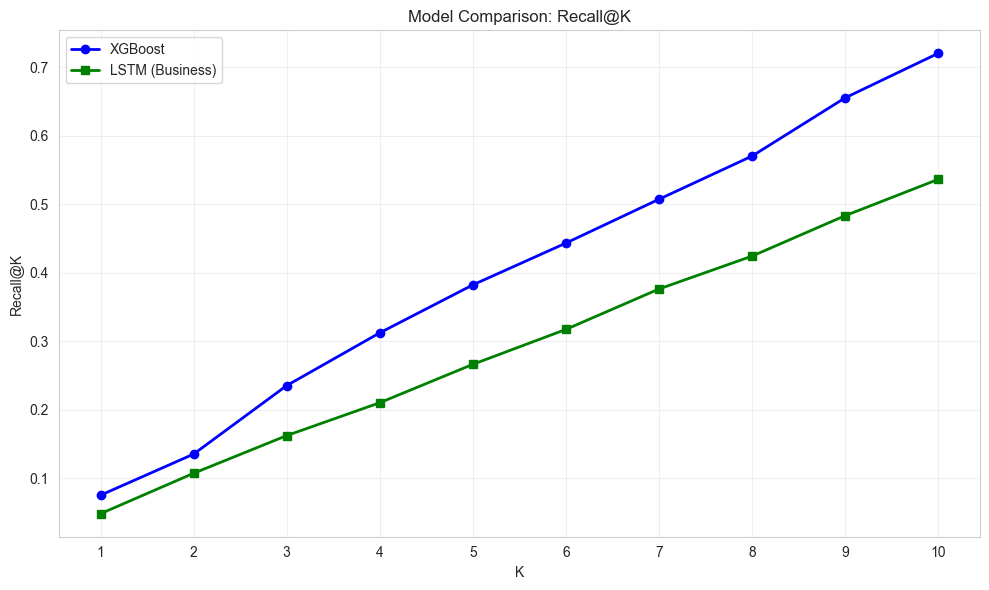

MODEL COMPARISON: Recall@K

K     XGBoost         LSTM (Business)     
----------------------------------------
1     7.50%           4.80%               
3     23.50%          16.20%              
5     38.20%          26.60%              
10    72.00%          53.60%              


In [12]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(10, 6))

k_values = list(range(1, 11))

# XGBoost recalls
xgb_recalls = []
for k in k_values:
    recall = xgb_preds.filter(
        (pl.col('rank') <= k) & 
        (pl.col('is_actual') == True)
    ).height / flows.height
    xgb_recalls.append(recall)

# LSTM recalls
lstm_recalls = []
for k in k_values:
    recall = biz_preds.filter(
        (pl.col('rank') <= k) & 
        (pl.col('is_actual') == True)
    ).height / flows.height
    lstm_recalls.append(recall)

ax.plot(k_values, xgb_recalls, marker='o', linewidth=2, label='XGBoost', color='blue')
ax.plot(k_values, lstm_recalls, marker='s', linewidth=2, label='LSTM (Business)', color='green')
ax.set_xlabel('K')
ax.set_ylabel('Recall@K')
ax.set_title('Model Comparison: Recall@K')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

plt.tight_layout()
plt.show()

# Print comparison table
print("=" * 80)
print("MODEL COMPARISON: Recall@K")
print("=" * 80)
print(f"\n{'K':<5} {'XGBoost':<15} {'LSTM (Business)':<20}")
print("-" * 40)
for k in [1, 3, 5, 10]:
    print(f"{k:<5} {xgb_recalls[k-1]:<15.2%} {lstm_recalls[k-1]:<20.2%}")


---
## Summary

This notebook explored the mock datasets generated for visualization development:

1. **Business Metadata**: 100 Atlanta restaurants with ratings, categories, and locations
2. **User Flows**: 1,000 consecutive restaurant visits from 153 users
3. **XGBoost Predictions**: 10,000 predictions (top-10 per flow) with ~72% Recall@10
4. **LSTM Predictions**: 15,000 predictions (category + business level)
   - Category accuracy: ~71%
   - Business Recall@10: ~54%

**Next Steps**:
- Use this data structure for visualization development
- Replace with real model predictions once training is complete
- Refer to `VISUALIZATION_TEAM_GUIDE.md` for detailed usage examples

**JSON Files**: Yes, the `*_sample.json` files contain the same data as the Parquet files, but in pretty-printed JSON format for easy inspection!
